position: 1
4.908738521234052


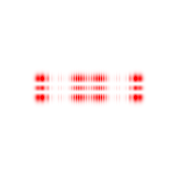

In [2]:
from math import *
import numpy as np
from scipy.special import *
import matplotlib.pyplot as plt
import matplotlib as mlp
from matplotlib.colors import LinearSegmentedColormap

#Transverse mode index 
n1=26
n2=30 
n3=34 
n4=38 
n5=42 
n6=1
n7=1
n8=1 
n9=1 
n10=1 
n=[n1,n2,n3,n4,n5,n6,n7,n8,n9,n10]

m1=2
m2=2 
m3=2 
m4=2 
m5=2 
m6=0 
m7=0 
m8=0 
m9=0 
m10=0 
m=[m1,m2,m3,m4,m5,m6,m7,m8,m9,m10]

#Parameters 
w=1#Beam waist 
lam=0.64 #Wave length 
k=2*np.pi/lam #Wave number 
zr=w**2*k/2 #Rayleigh length 
z=float(input('position: ')) #Beam position 
R=z+zr**2/z #Radius curvature of beam 
W=w*(1+(z/zr)**2)**0.5 #Beam size 
gouy=np.arctan(z/zr) #Gouy phase 
q=(1j)*zr #Complex beam parameter 
Q=z+q

#Definition of coodinate 
N=1000 
Ran=10 #Display range 
x=np.linspace(-Ran,Ran,N) 
y=np.linspace(-Ran,Ran,N) 
X,Y=np.meshgrid(x,y)

#Definition of Hermite Polynomial 
def Hermite(n,X): 
    Hn=0 
    for i in range(0,floor(n/2)+1):
        Hn += (-1)**i*(2*X)**(n-2*i)/(factorial(i)*factorial(n-2*i)) 
    Hn=Hn*factorial(n) 
    return Hn

#Definition of HG mode 
def HermiteGaussian(n,m,X,Y,z):
    u_n=((2/np.pi)**(1/4))*np.sqrt(1/(2**n*factorial(n)*w))*np.sqrt(q/Q)*(((q*Q.conjugate())/(q.conjugate()*Q))**(n/2))*Hermite(n,(np.sqrt(2)*X/W))*np.exp((-1j*k*X**2)/(2*Q)) 
    u_m=((2/np.pi)**(1/4))*np.sqrt(1/(2**m*factorial(m)*w))*np.sqrt(q/Q)*(((q*Q.conjugate())/(q.conjugate()*Q))**(m/2))*Hermite(m,(np.sqrt(2)*Y/W))*np.exp((-1j*k*Y**2)/(2*Q)) 
    u=u_n*u_m 
    umax=np.amax(u) 
    u_n=u/umax 
    return u_n

HG=[0]*10 
for i in range(10): 
    HG[i] = HermiteGaussian(n[i],m[i],X,Y,z)

#Surperposiotion of HG modes 
A=5
HGsup=0 
for i in range(A): 
    HGsup += HG[i]

#HG intensity 
I = np.real(HGsup*HGsup.conjugate()) 
Imax = np.amax(I) 
I_n = I/Imax


#Plot 
rb = LinearSegmentedColormap.from_list('name', ['white', 'red'])
fig = plt.figure(figsize=(3,3)) 
ax = fig.add_subplot(111) 
im=plt.imshow(I_n,vmax=0.8,vmin=0,cmap=rb) 
#im=plt.imshow(LGa,extent=(-1,1,-1,1),cmap='rainbow') 
ax.set_axis_off() #軸off


print('zr= ',zr)
#Saving figure 
save_path='C:/Users/maila/OneDrive/デスクトップ/保存先/HGz=0.png' 
#plt.savefig(save_path)